# Network Summary

## Network source and preprocesing

In [1]:
import json, sys
from urllib import request
from copy import copy

In [2]:
import json
import networkx as nx

In [3]:
CLIENT_ID = 56337756
APP_ID = 7379264

In [4]:
with open('data/nodes_data.json','r') as f:
    nodes_data = json.load(f)
with open('data/connections_data.json','r') as f:
    connections_data = json.load(f)

In [5]:
nodes_data = {int(k):v for k,v in nodes_data.items()}
connections_data = {int(k):v for k,v in connections_data.items()}

In [6]:
G = nx.from_dict_of_lists(connections_data)

In [7]:
for k,d in nodes_data.items():
    for k_, v_ in d.items():
        G.nodes[k][k_] = v_

In [8]:
nx.write_gpickle(G, 'network.gpickle')

In [9]:
nx.write_gexf(G, 'network.gexf')

In [10]:
G = nx.read_gpickle('network.gpickle')

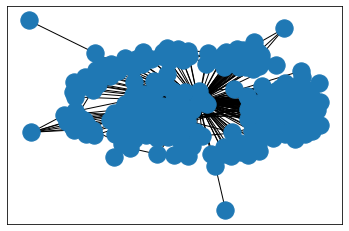

In [218]:
nx.draw_networkx(G, with_labels=False)

## Node/Edge attributes

node attributes

In [11]:
G.nodes[779564].keys()

dict_keys(['id', 'first_name', 'last_name', 'sex', 'city', 'university', 'university_name', 'faculty', 'faculty_name', 'graduation', 'education_status', 'online', 'track_code'])

## Size, Order

In [12]:
print(f"Order of network: {len(G.nodes)}")
print(f"Size of network: {len(G.edges)}")

Order of network: 255
Size of network: 1973


## Gorgeous network layout

## Degree distribution
Diameter, Clustering Coefficient

In [13]:
print(f"Diameter: {nx.diameter(G)}")
print(f"Mean Clustering Coefficient: {nx.cluster.average_clustering(G)}")

Diameter: 4
Mean Clustering Coefficient: 0.6662695390443035


# Structural Analysis

## Degree/Closeness/Betweennes centralities
Top nodes interpretation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Degree

In [31]:
degrees = pd.Series(dict(nx.degree(G))).sort_values(ascending=False)
degree_centr = pd.Series(dict(nx.degree_centrality(G))).sort_values(ascending=False)

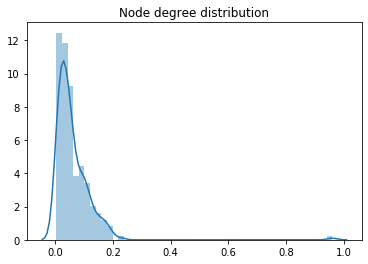

In [38]:
sns.distplot(degree_centr)
plt.title('Node degree distribution')
plt.show()

Интерпретация узлов:
* 1) Я
* 2) (58 общих друзей): Андрей Максименко: Один из лидеров друзей из Ижевска
* 3) (50 общих друзей): Татьяна Вольнова: Другой, формальный, лидер скаутов из Ижевска
* 4) (49 общих друзей): Анастасия Нелидова: В группе с предыдущими друзьями из Ижевска
...
* 27) (31 общий друг): Света Злобина: одногруппница из МГТУ
* 32) (29 общих друзей): Мустангер Шапиев: одногруппник из МГТУ
* 45) (26 общих друзей): Розалия Хафизова: одноклассница

### Closeness

In [98]:
closeness = pd.Series(dict(nx.closeness_centrality(G))).sort_values(ascending=False)

Интерпретация узлов:
* 1) 0,9621 Я
* 2) 0,5582 Андрей Максименко
* 3) 0,5486 Татьяна Волнова
* 4) 0,5474 Анастасия Нелидова
...
* 33) 0,5237 Света Злобина МГТУ 
* 40) 0,5205 Сергей Серов: Староста в МГТУ

### Betweeness

In [97]:
betweeness = pd.Series(nx.betweenness_centrality(G)).sort_values(ascending=False)

In [470]:
#idx = 7
idx += 1
idx ,G.nodes[betweeness.index[idx]], round(betweeness.values[idx],4)

(12,
 {'id': 55793295,
  'first_name': 'Maxim',
  'last_name': 'Sterkhov',
  'sex': 2,
  'city': {'id': 56, 'title': 'Izhevsk'},
  'university': 0,
  'university_name': '',
  'faculty': 0,
  'faculty_name': '',
  'graduation': 0,
  'online': 0,
  'track_code': '7511b574d5um1U1NBqT8EBE82hJyx-lBNtH2nKz5edujcQQDlEIa8P_hfRxSovJAcO5l2vqjiUwhypPy'},
 0.003)

Интерпретация узлов:
* 1) 0.8515 Я
* 2) 0.0096 Андрей Максименко
* 3) 0,0083 Алсу Райская
* 4) 0,0079 Никита Резниченко: Кто это вообще такой?
* 5) 0,0079 Денис Ерёмин: соотрядник из летнего лагеря
...
* 8) 0,0034 Сергей Серов: Староста МГТУ
* 9) 0.0034 Денис Пермяков: Худ. рук одного детского лагеря 

## Page-Rank. Comparison with centralities

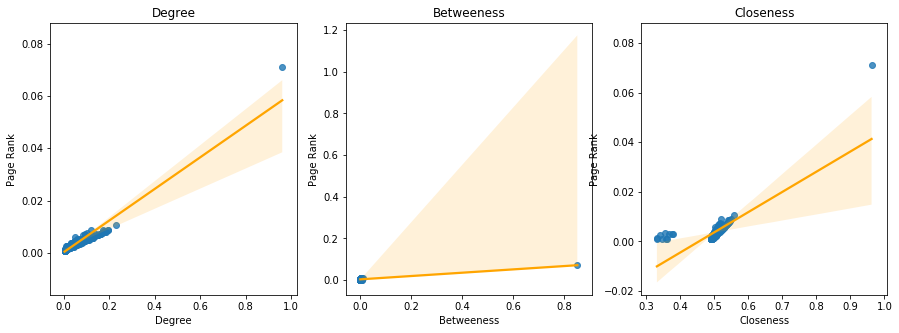

In [113]:
pr = pd.Series(nx.pagerank(G, alpha=0.85))
plt.figure(figsize=(15,5))
for idx, centr in enumerate([('Degree', degree_centr), ('Betweeness', betweeness), ('Closeness', closeness)]):
    plt.subplot(1,3,idx+1)
    title, centr = centr
    sns.regplot(x=centr.sort_index(), y=pr.sort_index(), line_kws={'color':'orange'})
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Page Rank')
plt.show()

## Node structural equivalence/similarity

In [119]:
import scipy.spatial as spt

In [175]:
def plotDist(A, figsize=(10,10)):
    f, ax = plt.subplots(2, 2, figsize=figsize)
    ax[0, 0].imshow(A, cmap = 'Greys', interpolation = 'None')
    ax[0, 0].set_title('Adjacency Matrix')
    
    D = np.corrcoef(A)
    ax[1, 0].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 0].set_title('Correlation coeff.')
    
    dVec = spt.distance.pdist(A, metric = 'euclidean')
    D = spt.distance.squareform(dVec)
    ax[0, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[0, 1].set_title('Euclidean Dist.')
    
    dVec = spt.distance.pdist(A, metric = 'cosine')
    D = spt.distance.squareform(dVec)
    ax[1, 1].imshow(D, cmap = 'Greys', interpolation = 'None')
    ax[1, 1].set_title('Cosine Dist.')

In [176]:
cm = list(nx.utils.reverse_cuthill_mckee_ordering(G))
A = nx.adjacency_matrix(G, nodelist=cm).todense()

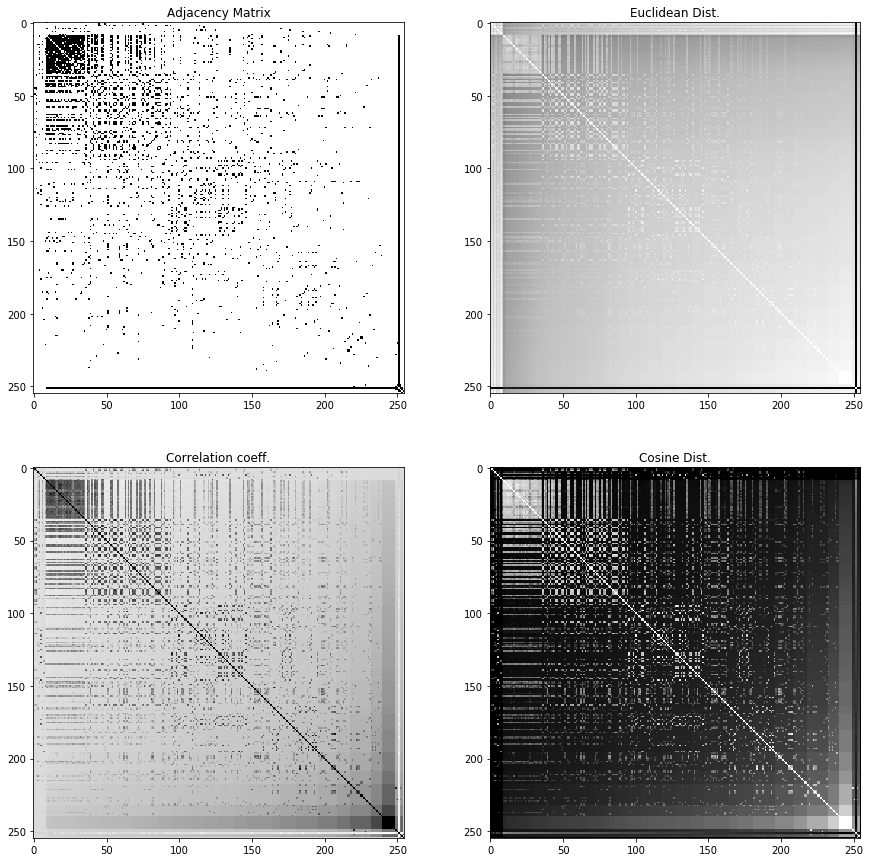

In [180]:
plotDist(A, figsize=(15,15))

## The closest random graph model similar to my SN

# Community Detection

## Clique search

## Best results of various community detection algorithms

## Incremental algorithms presented during classes

## Make results visible on the network layout or adjacency matrix picture